# Prodigy Infotech Task 3

# Task Done By : Heli Makadiya

Task : Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.


In [169]:
# import all library to requreted
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
import pickle

In [170]:
# loading the data from csv file to pandas dataframs
df= pd.read_csv('bank-full (1).csv')

In [171]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14038,34,management,married,tertiary,no,-73,yes,no,cellular,11,jul,90,1,-1,0,unknown,no
17060,30,management,single,tertiary,no,2,yes,yes,cellular,25,jul,1031,8,-1,0,unknown,yes
13081,25,blue-collar,single,secondary,yes,-220,no,no,cellular,8,jul,152,1,-1,0,unknown,no


In [172]:
# number of row and columns
df.shape

(45211, 17)

In [173]:
# gatting some information in DataFram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [174]:
# checking the number of mission value in each columns
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [175]:
# gatting some statistical measures about the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (tota

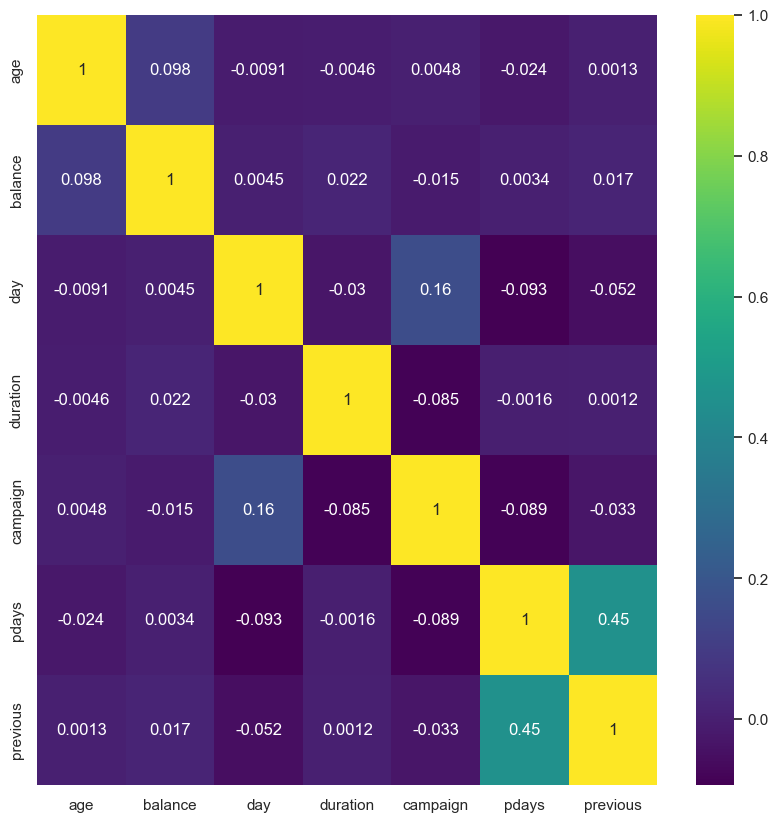

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a DataFrame
df= pd.read_csv('bank-full (1).csv')

# Display information about the DataFrame
print(df.info())
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Display the selected numeric columns
print(numeric_df.info())
print(numeric_df.head())

numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
numeric_df.dropna(inplace=True)

# Display the cleaned numeric DataFrame
print(numeric_df.info())
print(numeric_df.head())
plt.figure(figsize=(10, 10))
sns.heatmap(data=numeric_df.corr(), annot=True, cmap='viridis')
plt.show()

In [177]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

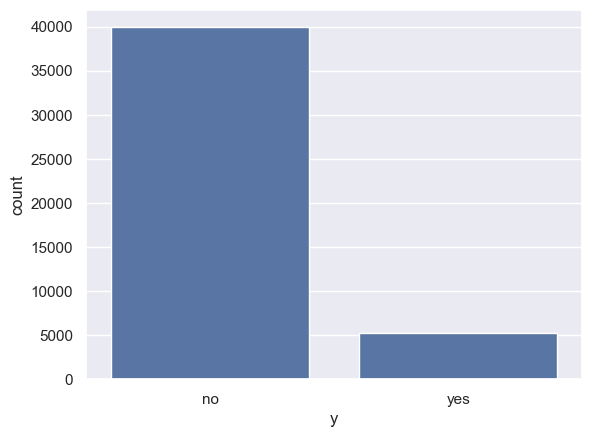

In [178]:
# making a count plot for Y column 
sns.set()
sns.countplot(x="y",data=df)

In [179]:
# checking no of parcentage yes and no
countyes=len(df[df.y=='yes'])
countno= len(df[df.y=='no'])
print(f'parcentage of yes---->',countyes/len(df.y)*100)
print(f'parcentage of no---->',countno/len(df.y)*100)

parcentage of yes----> 11.698480458295547
parcentage of no----> 88.30151954170445


In [180]:
# Replacing categorical columns 
df.replace({'y':{'no':0,'yes':1}},inplace=True)

C:\Users\AKAM\AppData\Local\Temp\ipykernel_9208\2013788939.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'y':{'no':0,'yes':1}},inplace=True)


C:\Users\AKAM\AppData\Local\Temp\ipykernel_9208\3854848915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'][df['y']==1])
C:\Users\AKAM\AppData\Local\Temp\ipykernel_9208\3854848915.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'][df['y']==0])


<Axes: xlabel='age', ylabel='Density'>

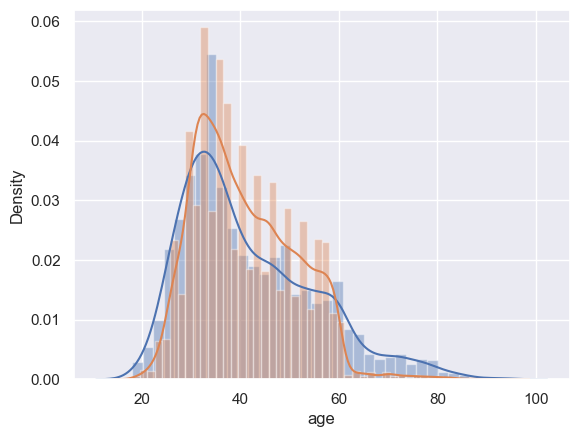

In [181]:
sns.distplot(df['age'][df['y']==1])
sns.distplot(df['age'][df['y']==0])

<Axes: xlabel='age', ylabel='count'>

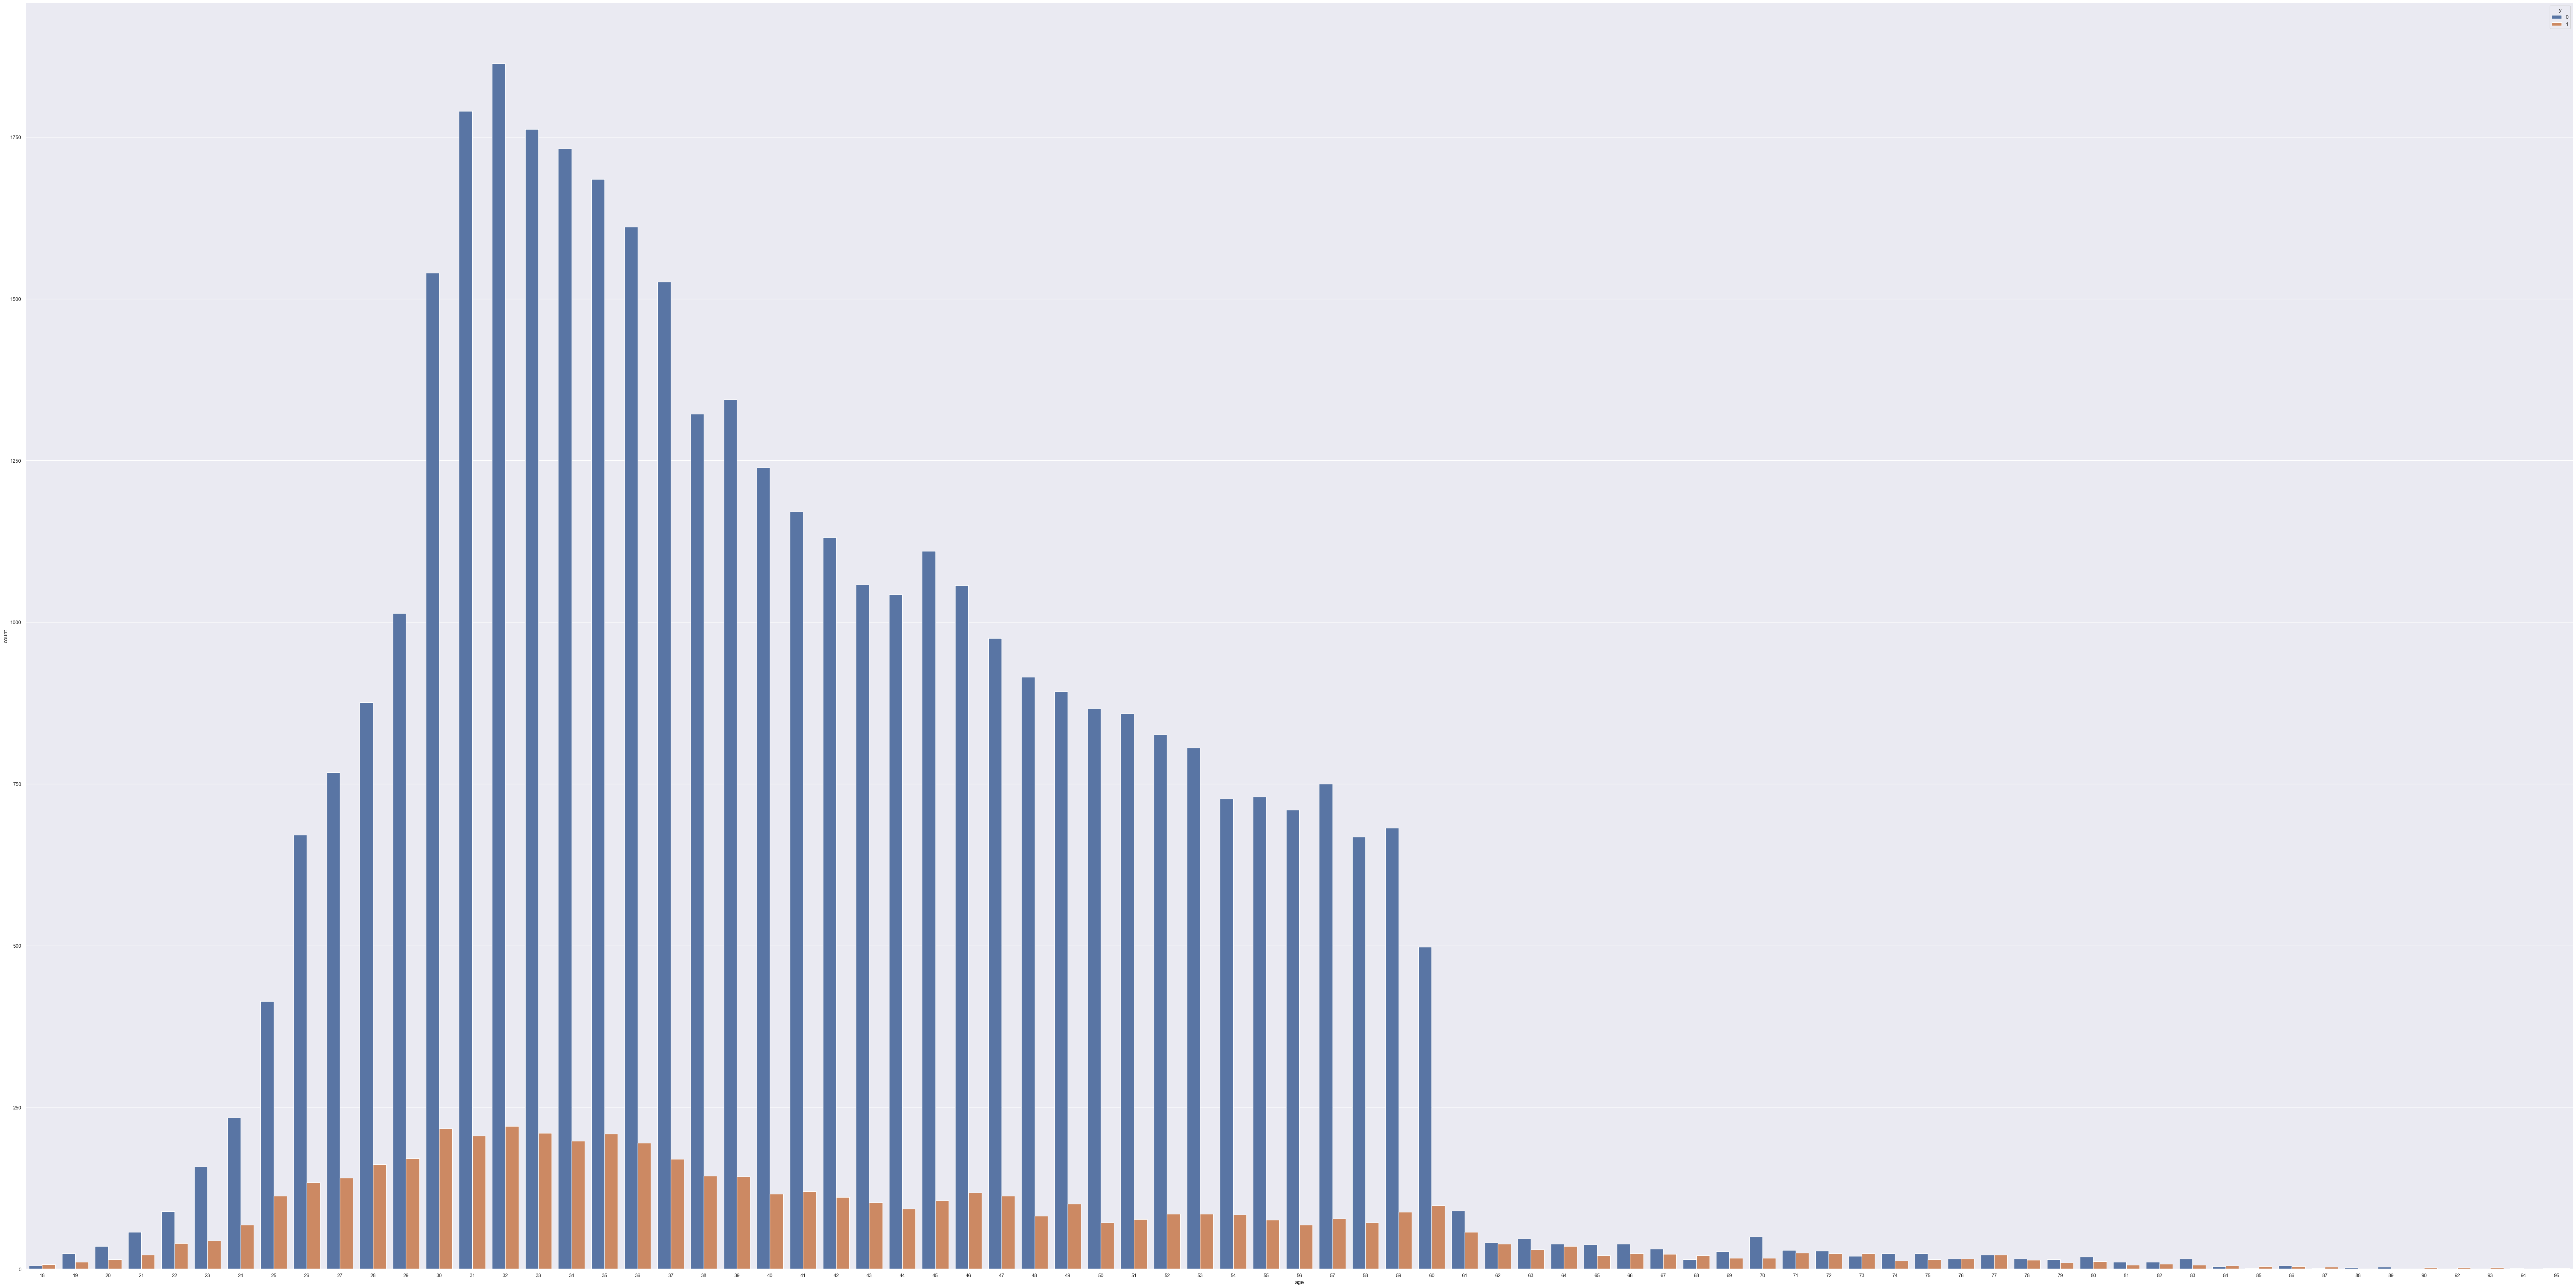

In [182]:
# no of y Age base
plt.figure(figsize=(100,50))
sns.countplot(x='age',hue='y',data=df)

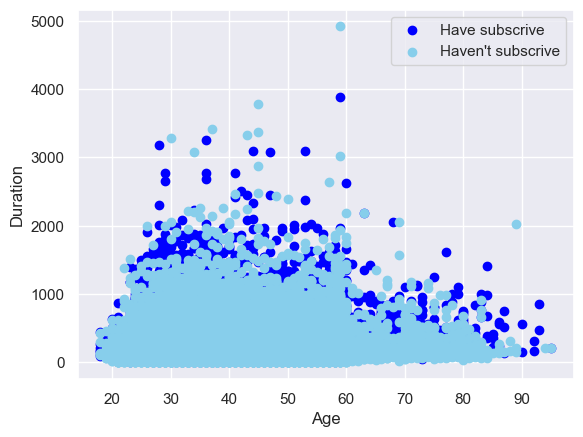

In [183]:
plt.scatter(x=df.age[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.age[df.y==0],y=df.duration[df.y==0],c='skyblue')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

In [184]:
# checking parcentage of people y in age
df.groupby(['age'])['y'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: y, Length: 77, dtype: float64

In [185]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

<Axes: xlabel='job', ylabel='count'>

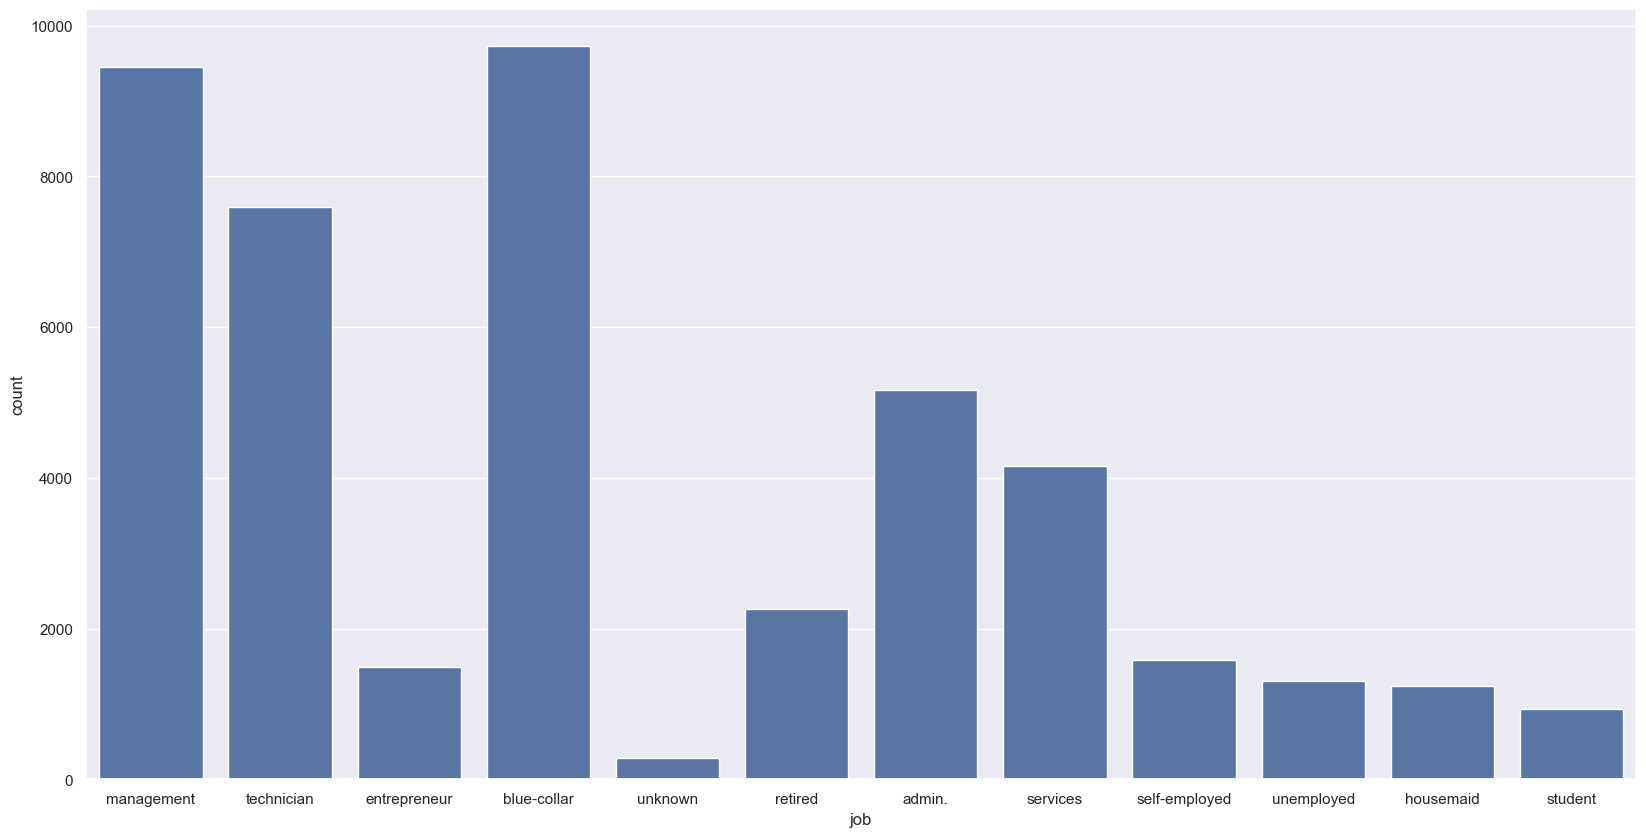

In [186]:
# making a count plot for job column 
plt.figure(figsize=(20,10))
sns.countplot(x="job",data=df)

<Axes: xlabel='job', ylabel='count'>

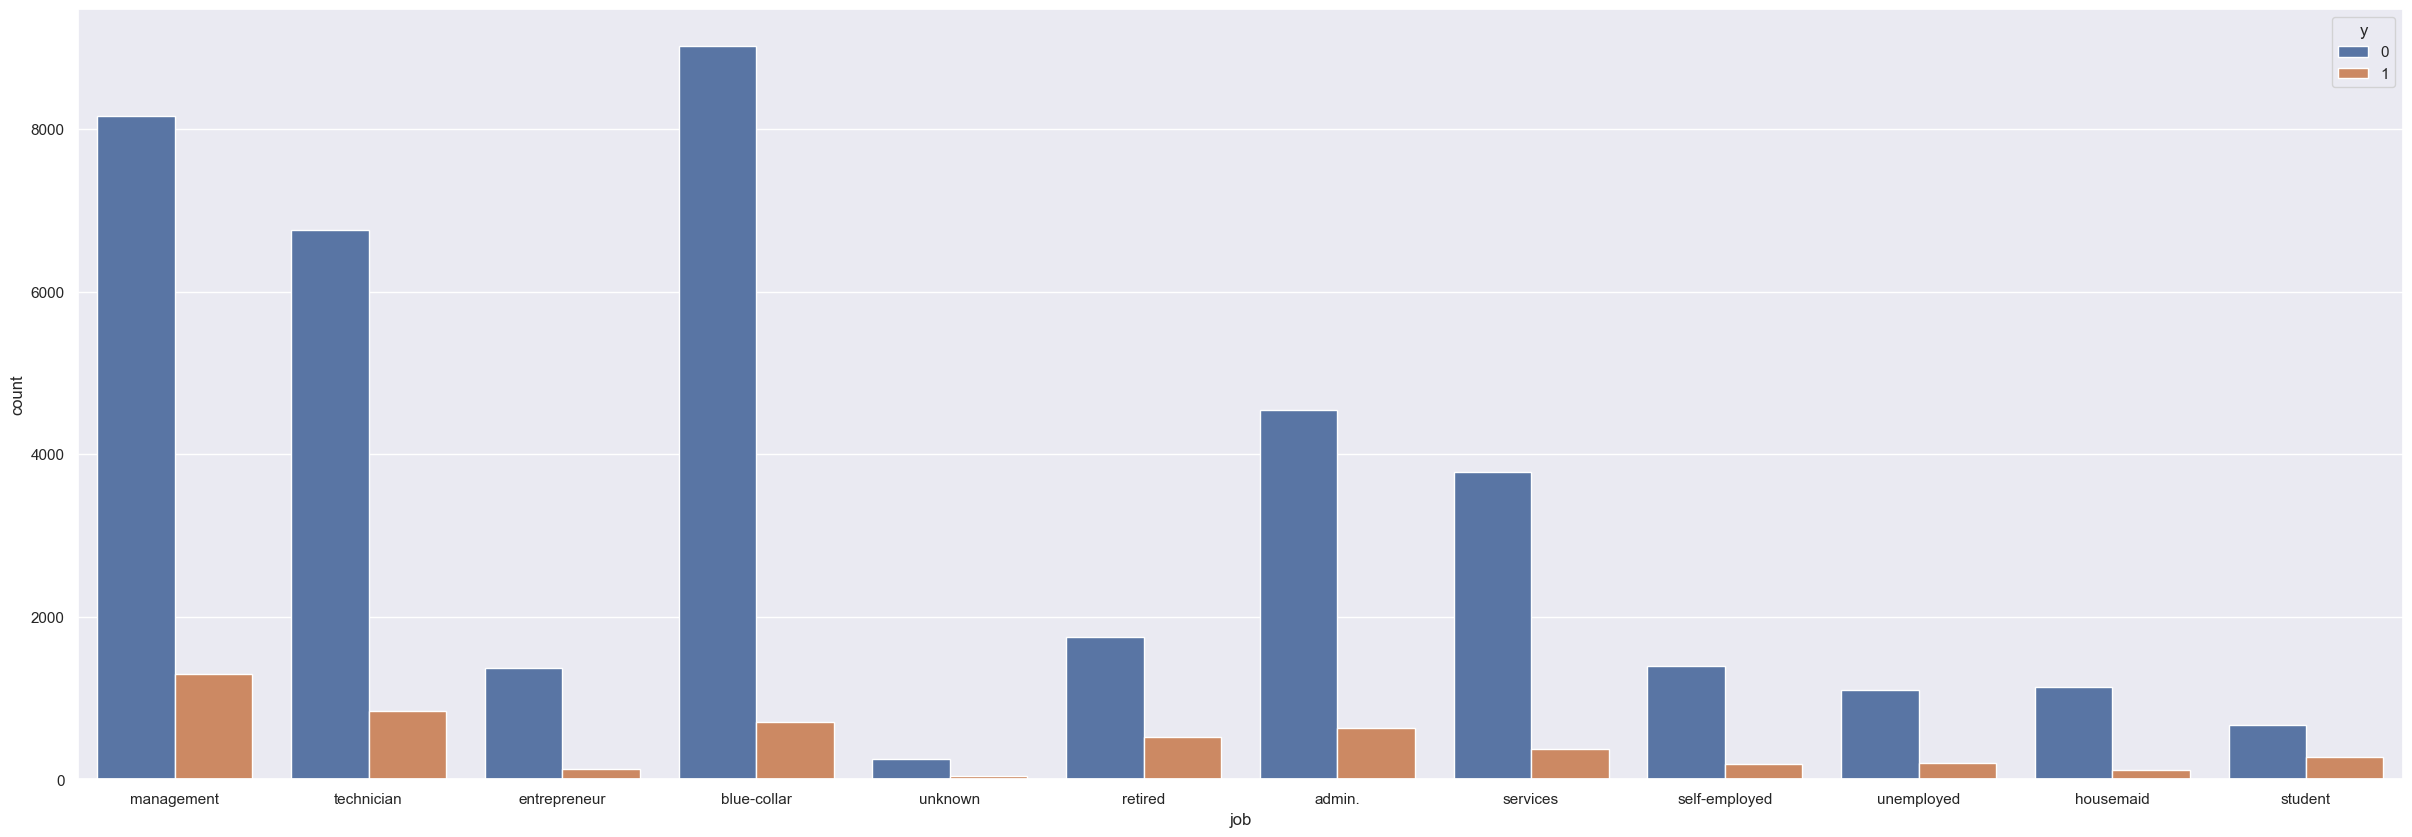

In [187]:
# no of y job base
plt.figure(figsize=(30,10))
sns.countplot(x='job',hue='y',data=df)

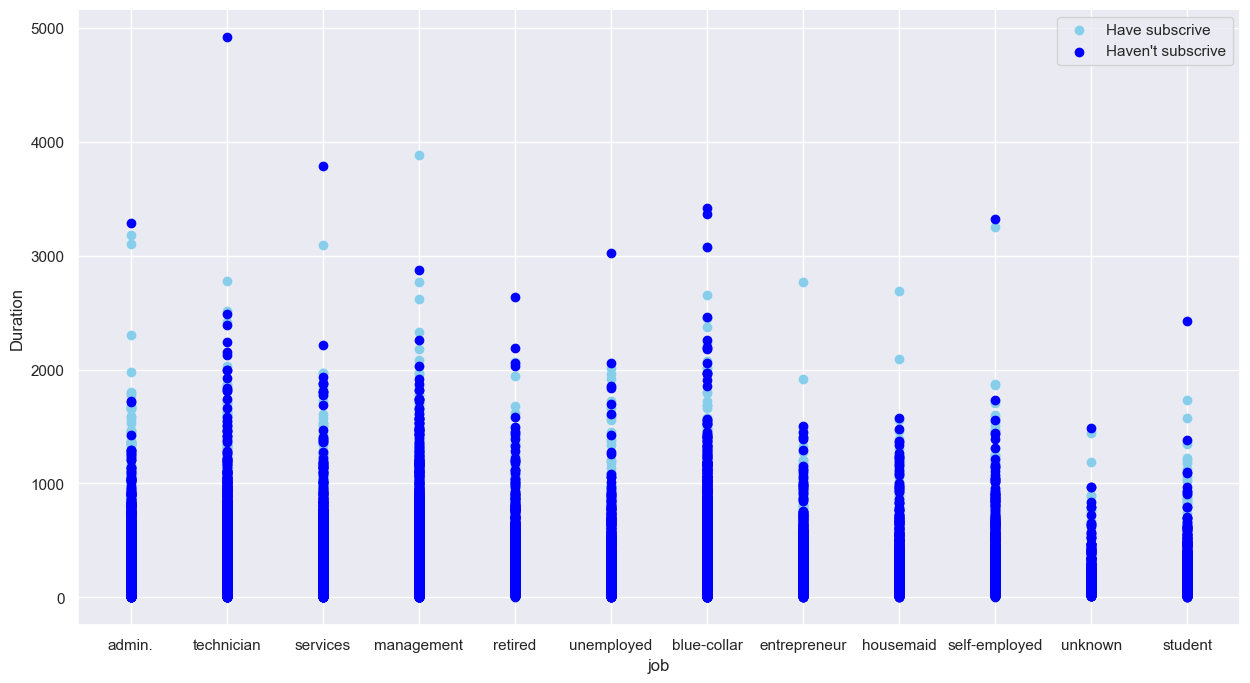

In [188]:
plt.figure(figsize=(15,8))
plt.scatter(x=df.job[df.y==1],y=df.duration[df.y==1],c='skyblue')
plt.scatter(x=df.job[df.y==0],y=df.duration[df.y==0],c='blue')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('job')
plt.ylabel('Duration')
plt.show()

In [189]:
# checking parcentage of people y in job
df.groupby(['job'])['y'].mean()

job
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: y, dtype: float64

<Axes: xlabel='marital', ylabel='count'>

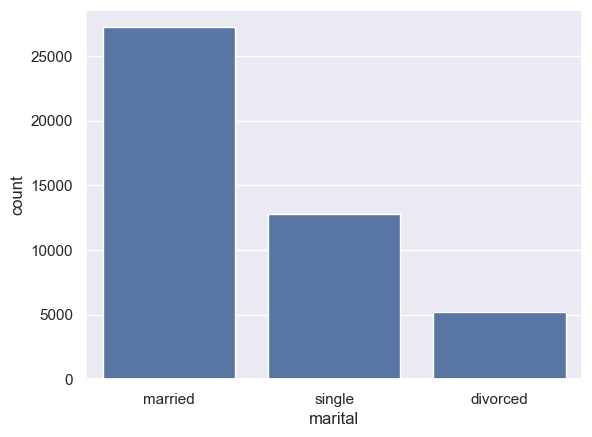

In [190]:
# making a count plot for marital column 
sns.countplot(x="marital",data=df)

<Axes: xlabel='marital', ylabel='count'>

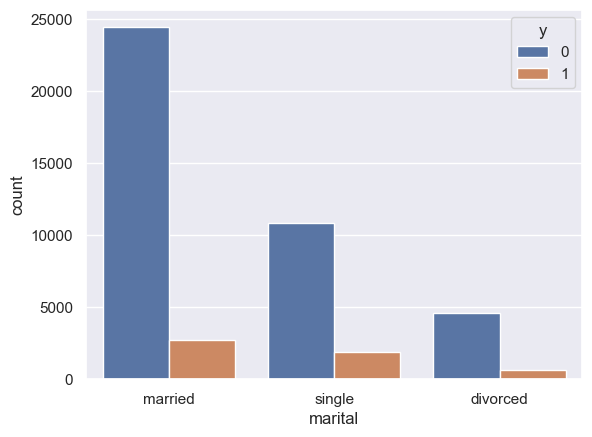

In [191]:
# no of y marital base
sns.countplot(x='marital',hue='y',data=df)

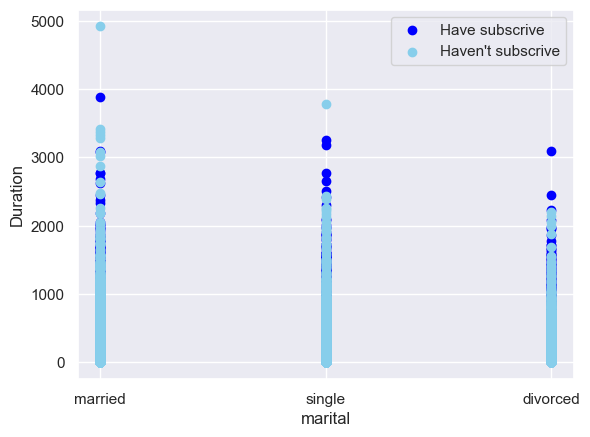

In [192]:
# plt.figure(figsize=(15,8))
plt.scatter(x=df.marital[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.marital[df.y==0],y=df.duration[df.y==0],c='skyblue')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('marital')
plt.ylabel('Duration')
plt.show()

In [193]:
# checking parcentage of people y in marital
df.groupby(['marital'])['y'].mean()

marital
divorced    0.119455
married     0.101235
single      0.149492
Name: y, dtype: float64

In [194]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

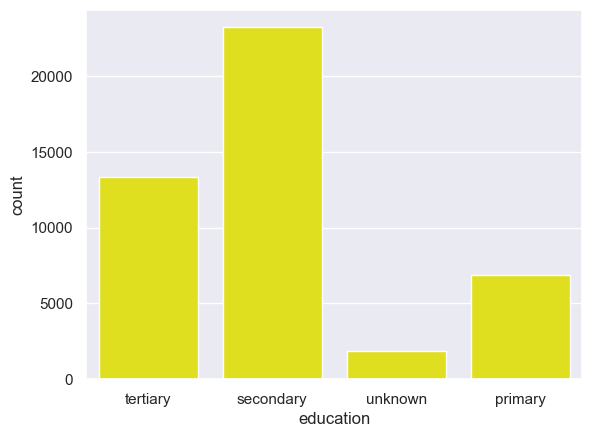

In [195]:
# making a count plot for Y column 
sns.countplot(x="education",data=df,color="yellow")

<Axes: xlabel='education', ylabel='count'>

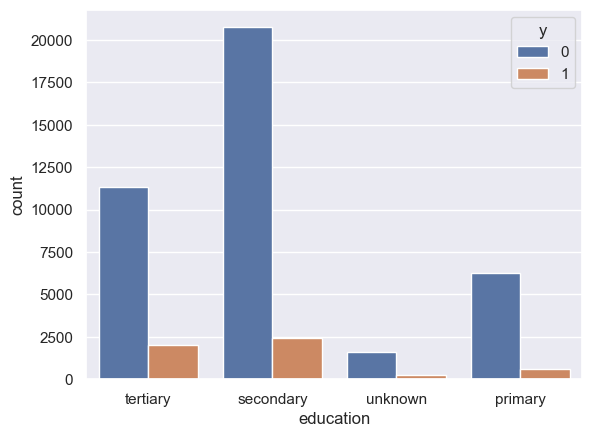

In [196]:
# no of y education base
sns.countplot(x='education',hue='y',data=df)

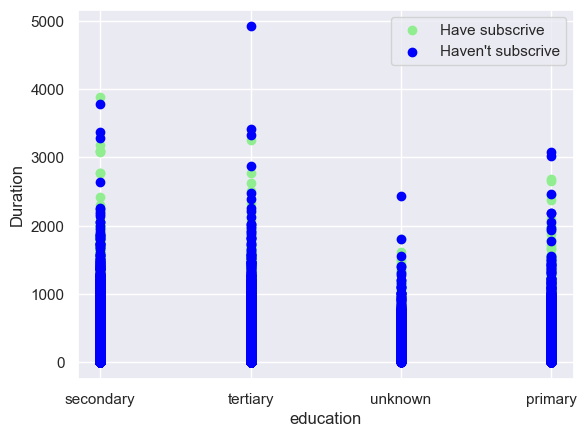

In [197]:
plt.scatter(x=df.education[df.y==1],y=df.duration[df.y==1],c='lightgreen')
plt.scatter(x=df.education[df.y==0],y=df.duration[df.y==0],c='blue')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('education')
plt.ylabel('Duration')
plt.show()

In [198]:
# checking parcentage of people y in education
df.groupby(['education'])['y'].mean()

education
primary      0.086265
secondary    0.105594
tertiary     0.150064
unknown      0.135703
Name: y, dtype: float64

<Axes: xlabel='housing', ylabel='count'>

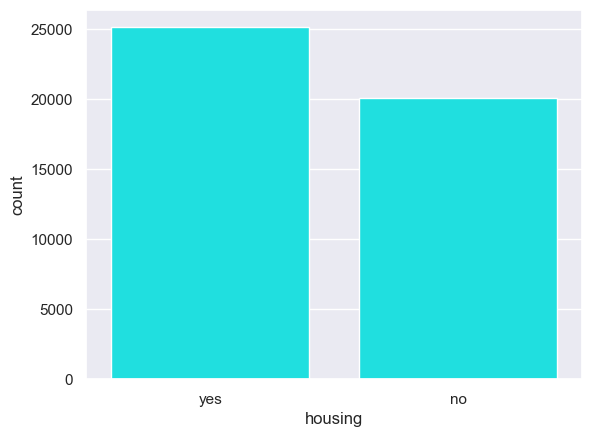

In [199]:
# making a count plot for housing column 
sns.countplot(x="housing",data=df,color="cyan")

<Axes: xlabel='housing', ylabel='count'>

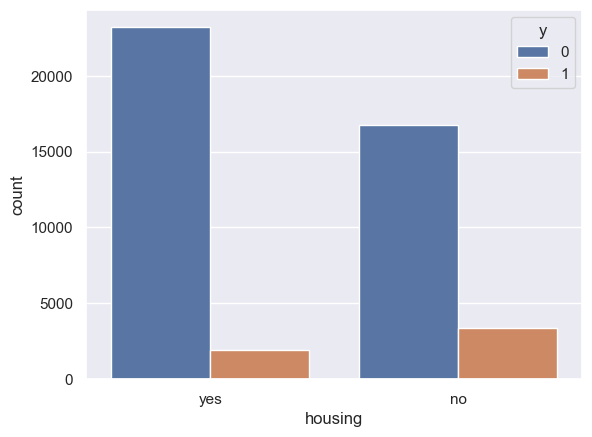

In [200]:
# no of y housing base
sns.countplot(x='housing',hue='y',data=df)

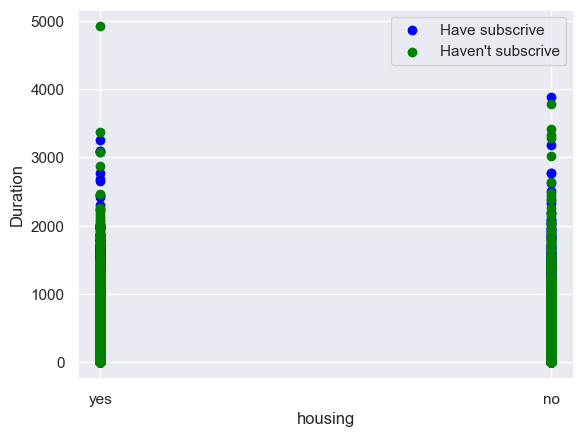

In [201]:
plt.scatter(x=df.housing[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.housing[df.y==0],y=df.duration[df.y==0],c='green')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('housing')
plt.ylabel('Duration')
plt.show()

In [202]:
# checking parcentage of people y in housing
df.groupby(['housing'])['y'].mean()

housing
no     0.167024
yes    0.077000
Name: y, dtype: float64

In [203]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='loan', ylabel='count'>

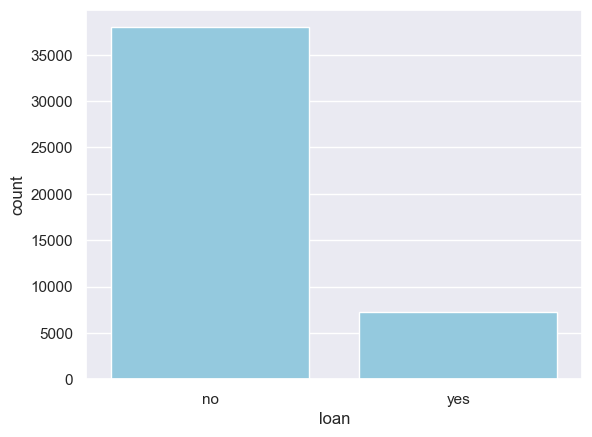

In [204]:
# making a count plot for loan column 
sns.countplot(x="loan",data=df,color="skyblue")

C:\Users\AKAM\AppData\Local\Temp\ipykernel_9208\615730756.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightblue'` for the same effect.

  sns.countplot(x='loan',hue='y',data=df,color="lightblue")


<Axes: xlabel='loan', ylabel='count'>

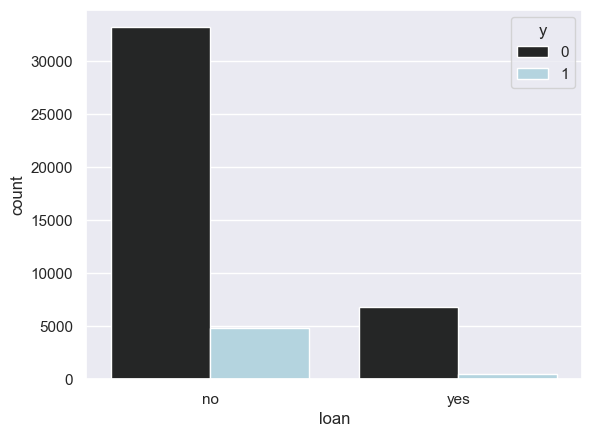

In [205]:
# no of y loan base
sns.countplot(x='loan',hue='y',data=df,color="lightblue")

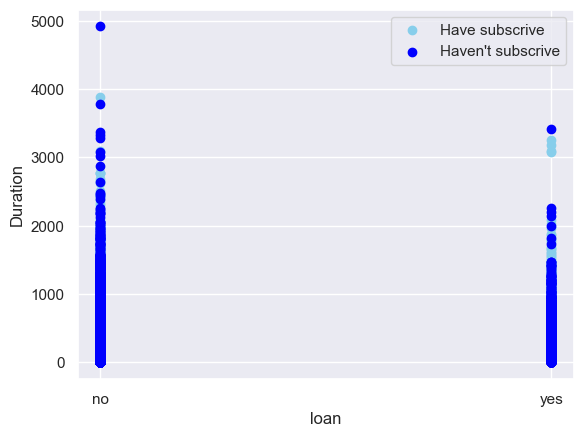

In [206]:
plt.scatter(x=df.loan[df.y==1],y=df.duration[df.y==1],c='skyblue')
plt.scatter(x=df.loan[df.y==0],y=df.duration[df.y==0],c='blue')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('loan')
plt.ylabel('Duration')
plt.show()

In [207]:
# checking parcentage of people y in loan
df.groupby(['loan'])['y'].mean()

loan
no     0.126557
yes    0.066814
Name: y, dtype: float64

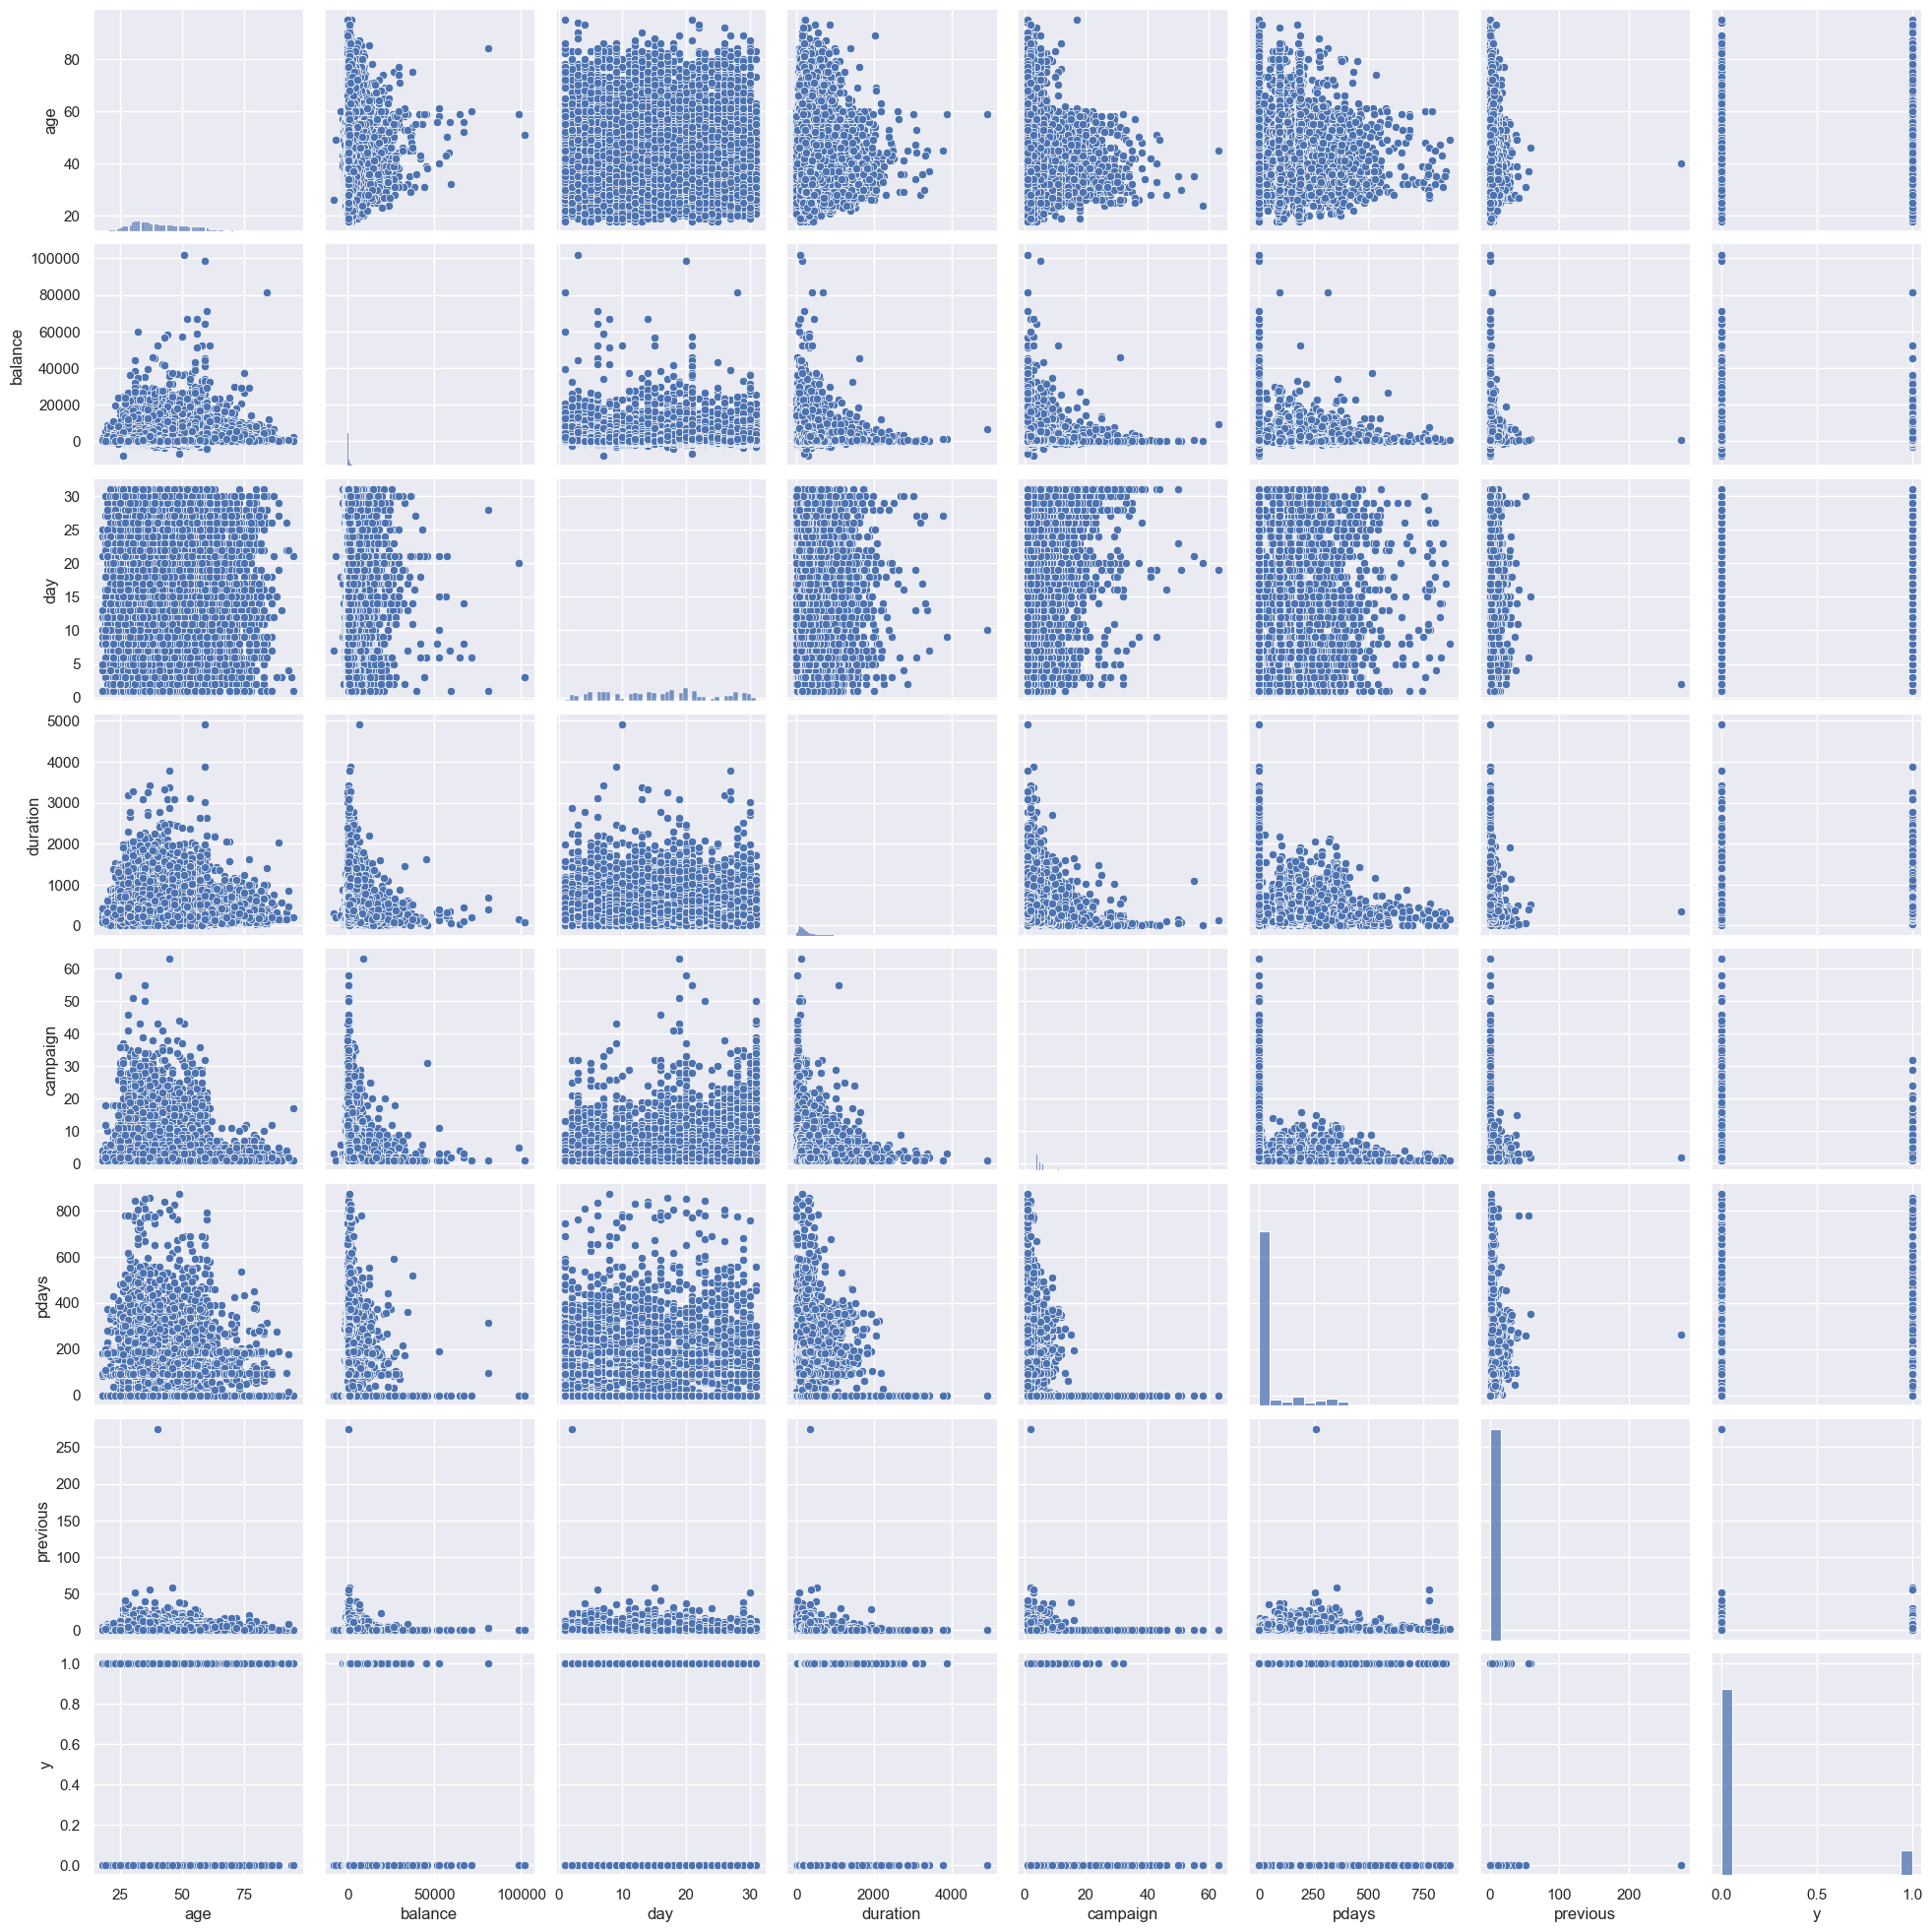

In [208]:
sns.pairplot(data=df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
   age           job  marital  education default  balance housing loan  \
0   58    management

c:\Users\AKAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\AKAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


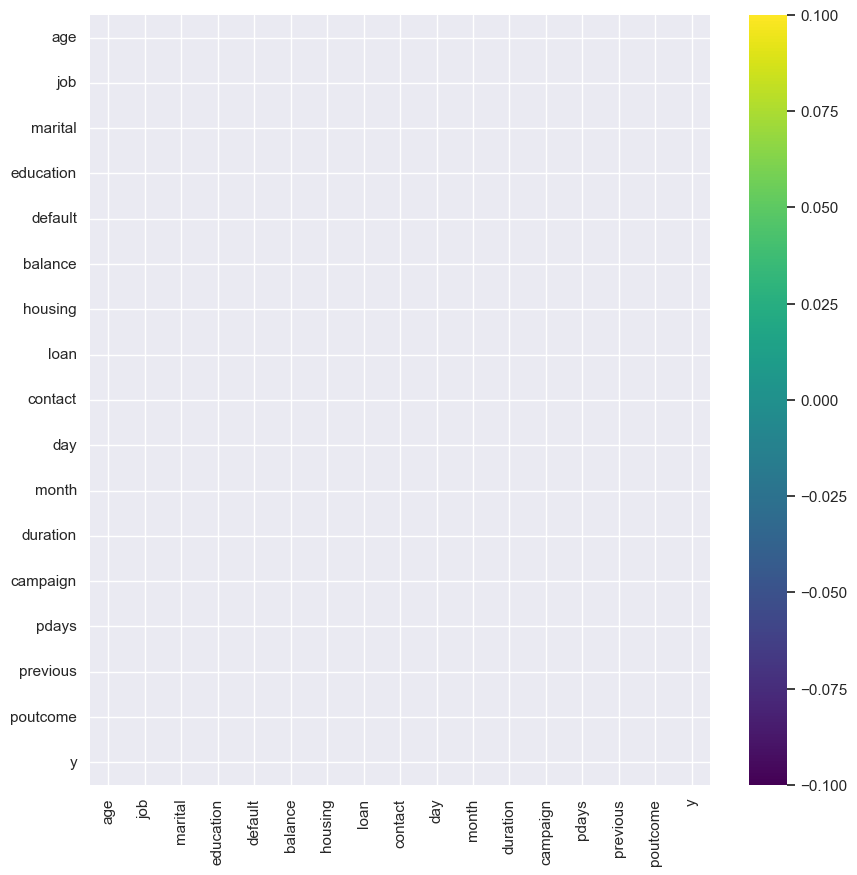

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df= pd.read_csv('bank-full (1).csv')

# Inspect the DataFrame
print(df.info())
print(df.head())

non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Convert non-numeric columns to numeric if possible
for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values resulting from the conversion
df.dropna(subset=non_numeric_cols, inplace=True)

# Verify that conversion worked
print(df.info())

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Verify the numeric DataFrame
print(numeric_df.info())
print(numeric_df.head())


# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data=numeric_df.corr(), annot=True, cmap='viridis')
plt.show()


In [210]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
   age           job  marital  education default  balance housing loan  \
0   58    management

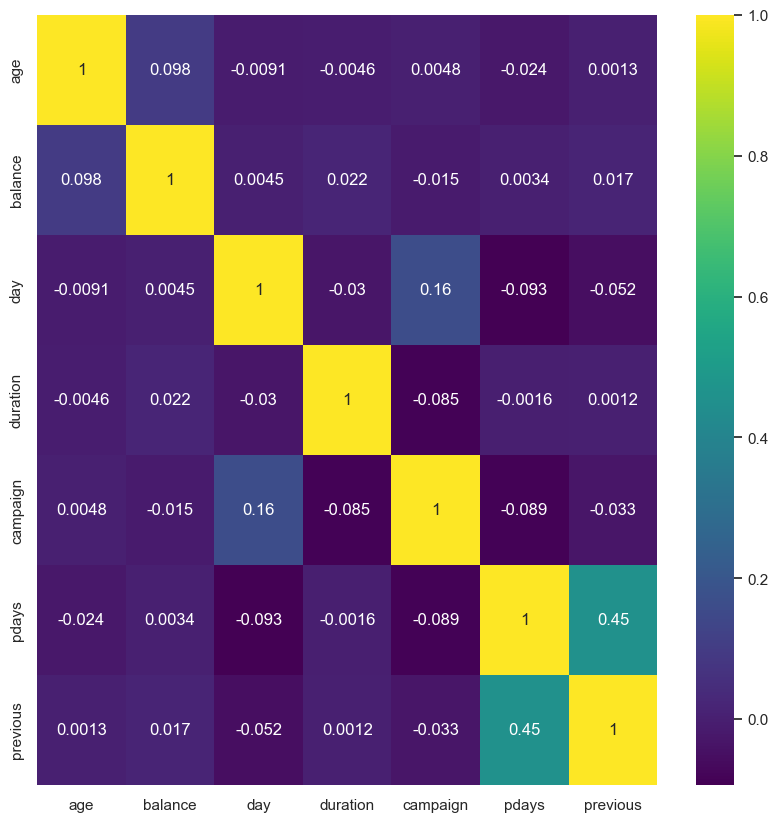

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
44108,69,retired,married,secondary,no,2473,no,no,cellular,8,jul,967,3,-1,0,unknown,yes
34831,28,student,single,tertiary,no,471,yes,no,cellular,6,may,209,1,-1,0,unknown,no
10624,36,housemaid,married,tertiary,yes,-1941,yes,no,unknown,16,jun,505,1,-1,0,unknown,no
879,38,admin.,married,secondary,no,8,yes,no,unknown,7,may,125,1,-1,0,unknown,no


In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df= pd.read_csv('bank-full (1).csv')

# Inspect the DataFrame
print(df.info())
print(df.head())

numeric_df = df.select_dtypes(include=['number'])

# Verify the numeric DataFrame
print(numeric_df.info())
print(numeric_df.head())

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data=numeric_df.corr(), annot=True, cmap='viridis')
plt.show()

df.sample(4)

# Encoding

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [213]:
# Encoding categorical columns
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [214]:
# Encoding categorical columns
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [215]:
# Encoding categorical columns
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [216]:
# Encoding categorical columns
df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [217]:
# Encoding categorical columns
df['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [218]:
# Encoding categorical columns
df['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [219]:
# Replacing all categorical columns 
df.replace({'job':{ 'blue-collar' : 0,
                    'management'  : 1,    
                   'technician'   : 2,
                    'admin.'      : 3, 
                    'services'    : 4,
                    'retired'     : 5,
                    'self-employed':6,
                    'entrepreneur' :7,
                    'unemployed'   :8,
                    'housemaid'    :9,
                    'student'      :10,
                    'unknown'      :11, },
            'marital':{'married':0,'single':1,'divorced':2},
            'education':{'secondary':0,'tertiary':1,'primary':2,'unknown':3},
            'default':{'no':0,'yes':1},
            'housing':{'no':0,'yes':1},
            'loan':{'no':0,'yes':1}
                      },inplace=True)

C:\Users\AKAM\AppData\Local\Temp\ipykernel_9208\2036316381.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'job':{ 'blue-collar' : 0,


In [220]:
# Drop columns
df.drop(columns=['contact','day','month','poutcome'],inplace=True)

In [221]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
37819,34,0,0,0,0,237,1,0,115,3,-1,0,no
1662,49,4,2,0,0,470,1,0,659,2,-1,0,no
1193,35,1,2,1,0,3837,1,0,1084,1,-1,0,yes
16049,30,1,0,1,0,3,1,0,67,9,-1,0,no
28969,29,2,1,1,0,2325,0,0,125,1,-1,0,yes


# Pre-modeling

In [222]:
x=df.drop(columns=['y'])
y=df.y

In [223]:
x.shape

(45211, 12)

In [224]:
y.shape

(45211,)

In [225]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# Using Logistic Regression

In [226]:
Lor=LogisticRegression()
Lor.fit(x_train,y_train)

c:\Users\AKAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [227]:
Lor.score(x_test,y_test)

0.8890854804821409

In [228]:
train_score = Lor.score(x_train,y_train)
print(train_score)

test_score = Lor.score(x_test,y_test)
print(test_score)

0.8889626188896262
0.8890854804821409


In [229]:
print(classification_report(y_test,Lor.predict(x_test)))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7994
         yes       0.57      0.18      0.28      1049

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [230]:
print(confusion_matrix(y_test,Lor.predict(x_test)))

[[7847  147]
 [ 856  193]]


# Using Random Forest Classifier

In [231]:
Rm = RandomForestClassifier() 
Rm.fit(x_train,y_train)

RandomForestClassifier()

In [232]:
Rm.score(x_test,y_test)

0.8997014265177485

In [233]:
train_score = Rm.score(x_train,y_train)
print(train_score)

test_score = Rm.score(x_test,y_test)
print(test_score)

0.9999723512497235
0.8997014265177485


In [234]:
print(classification_report(y_test,Rm.predict(x_test)))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7994
         yes       0.61      0.36      0.46      1049

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [235]:
print(confusion_matrix(y_test,Rm.predict(x_test)))

[[7756  238]
 [ 669  380]]


# Using Decision Tree Classifier

In [236]:
Dc = DecisionTreeClassifier()
Dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [237]:
y_pred = Dc.predict(x_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [238]:
# Testing Data Evaluation 

y_pred = Dc.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_test,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[7303  691]
 [ 632  417]]
**************************************************
Accuracy Score = 0.853698993696782
**************************************************
Classification report= 
              precision    recall  f1-score   support

          no       0.92      0.91      0.92      7994
         yes       0.38      0.40      0.39      1049

    accuracy                           0.85      9043
   macro avg       0.65      0.66      0.65      9043
weighted avg       0.86      0.85      0.86      9043



In [239]:
# Training Data Evaluation 

y_pred = Dc.predict(x_train)

cm = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_train,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[31928     0]
 [    0  4240]]
**************************************************
Accuracy Score = 1.0
**************************************************
Classification report= 
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     31928
         yes       1.00      1.00      1.00      4240

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



# Randoimisezed search

In [240]:
DC= DecisionTreeClassifier(min_samples_split =  15,min_samples_leaf =  16,max_depth=3,criterion='gini')

In [241]:
DC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=15)

In [242]:
# Testing Data Evaluation 

y_pred = DC.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_test,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[7774  220]
 [ 792  257]]
**************************************************
Accuracy Score = 0.8880902355413026
**************************************************
Classification report= 
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7994
         yes       0.54      0.24      0.34      1049

    accuracy                           0.89      9043
   macro avg       0.72      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043



In [243]:
# Training Data Evaluation 

y_pred = DC.predict(x_train)

cm = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_train,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[31119   809]
 [ 3169  1071]]
**************************************************
Accuracy Score = 0.8900132714001328
**************************************************
Classification report= 
              precision    recall  f1-score   support

          no       0.91      0.97      0.94     31928
         yes       0.57      0.25      0.35      4240

    accuracy                           0.89     36168
   macro avg       0.74      0.61      0.64     36168
weighted avg       0.87      0.89      0.87     36168



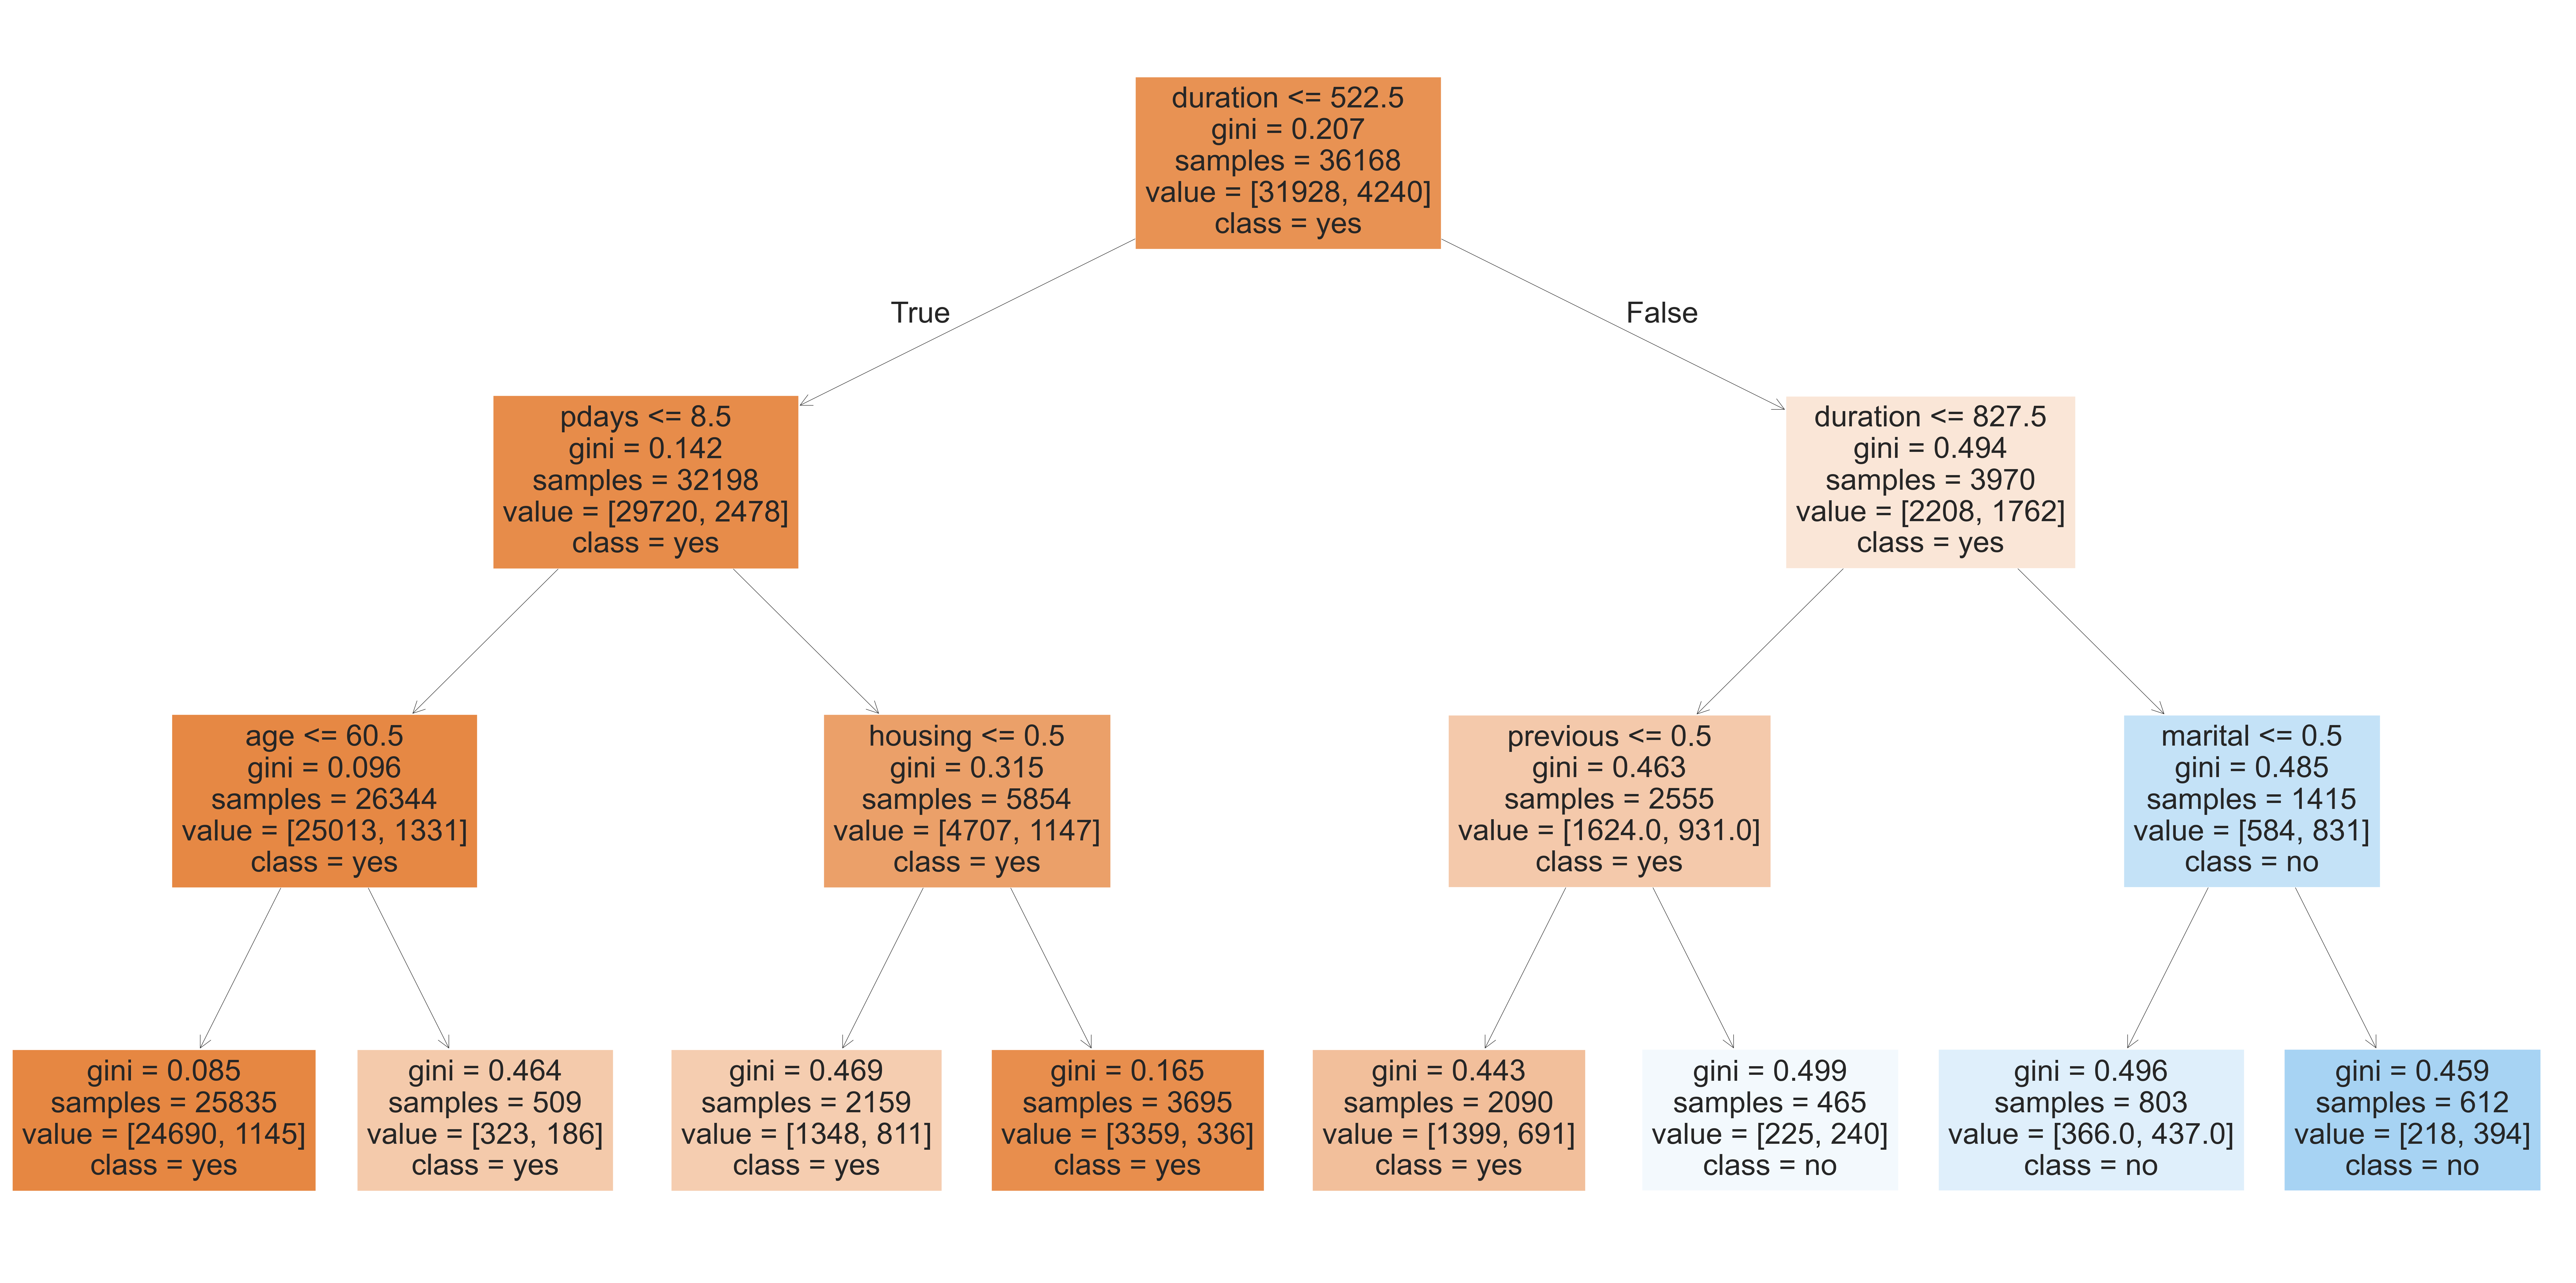

In [244]:
# Bias >> low 
# variance >> low
plt.figure(figsize=(100,50))
tree_fig = plot_tree(DC, feature_names=x.columns, filled=True, class_names=['yes','no'])
plt.savefig("decision_tree2.png")

# Save Model File

In [245]:
with open('model.pkl','wb') as file: 
    pickle.dump(DC,file)

# Read pickle file

In [246]:
pkl=pd.read_pickle('model.pkl')
pkl

DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=15)